<a href="https://colab.research.google.com/github/Ahmed-Magdi1/2DOF-Helicopter-LSTM/blob/v.2/RNNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import pandas as pd
import numpy as np
import time
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential, load_model
from tensorflow.keras.layers import LSTM, Dense
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

In [24]:
# Load input and output files
inputs = pd.read_csv('input.csv')  # Columns: V, I_pitch, I_yaw
outputs = pd.read_csv('output.csv')  # Columns: pitch_angle, yaw_angle

# Convert to NumPy arrays
X = inputs.values  # Shape: (samples, features)
Y = outputs.values  # Shape: (samples, targets)

## Normalize the Data

In [25]:
# Create scalers
scaler_X = MinMaxScaler()
scaler_Y = MinMaxScaler()

# Scale inputs and outputs
X_scaled = scaler_X.fit_transform(X)
Y_scaled = scaler_Y.fit_transform(Y)

## Reshape Data for LSTM

In [26]:
timesteps = 15  # Define the number of past time steps for each input sequence
features = X_scaled.shape[1]  # Number of input features (V, I_pitch, I_yaw)

## Create Sequences

In [27]:
# Create sequences for inputs and outputs
def create_sequences(data, labels, timesteps):
    X_seq, Y_seq = [], []
    for i in range(len(data) - timesteps):
        X_seq.append(data[i:i + timesteps])  # Input sequence
        Y_seq.append(labels[i + timesteps])  # Corresponding output
    return np.array(X_seq), np.array(Y_seq)

X_seq, Y_seq = create_sequences(X_scaled, Y_scaled, timesteps)

## Split Data into Train, Validation, and Test Sets

In [28]:
# Split into training and test sets
X_train, X_test, Y_train, Y_test = train_test_split(X_seq, Y_seq, test_size=0.2, random_state=42)
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size=0.2, random_state=42)

## Define the LSTM Model

In [29]:
# Define the LSTM model
model = Sequential([
    LSTM(64, activation='tanh', input_shape=(timesteps, features), return_sequences=True),
    LSTM(32, activation='tanh'),
    Dense(2, activation='linear')
])

# Compile the model
model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 15, 64)              │          17,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 32)                  │          12,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 2)                   │              66 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 29,890 (116.76 KB)

 Trainable params: 29,890 (116.76 KB)

 Non-trainable params: 0 (0.00 B)

## Train the Model

In [59]:
start_time = time.time()

# Train the model
history = model.fit(
    X_train, Y_train,
    validation_data=(X_val, Y_val),
    epochs=50,
    batch_size=16,
    verbose=1
)
training_time = time.time() - start_time

Epoch 1/50
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - loss: 5.3988e-04 - mae: 0.0132 - val_loss: 9.1729e-04 - val_mae: 0.0171
Epoch 2/50
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - loss: 6.0224e-04 - mae: 0.0140 - val_loss: 7.3128e-04 - val_mae: 0.0148
Epoch 3/50
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 3.0107e-04 - mae: 0.0102 - val_loss: 7.3690e-04 - val_mae: 0.0148
Epoch 4/50
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - loss: 2.7146e-04 - mae: 0.0097 - val_loss: 7.6962e-04 - val_mae: 0.0151
Epoch 5/50
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 3.0101e-04 - mae: 0.0102 - val_loss: 7.4976e-04 - val_mae: 0.0152
Epoch 6/50
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 40s 16ms/step - loss: 2.7948e-04 - mae: 0.0099 - val_loss: 8.0680e-04 - val_mae: 0.0158
Epoch 7/50
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 35s 16ms/step - loss: 3.0170e-04 - mae: 0.0102 - val_loss: 7.3814e-04 - val_mae: 0.0150
Epoch 8/50
2147/2147 ━━━━━━━━━━━━━━━━━━━━ 41s 16ms/step - loss: 2.7780e-04 - mae: 0.0098 -

## Evaluate the Model

In [60]:
loss, mae = model.evaluate(X_test, Y_test)
print(f"Test Loss: {loss}, Test MAE: {mae}")

336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - loss: 6.3412e-04 - mae: 0.0139
Test Loss: 0.000671018089633435, Test MAE: 0.014039411209523678


## Make Predictions

In [61]:
# Predictions
start_time = time.time()
Y_pred_scaled = model.predict(X_test)
inference_time = time.time() - start_time
Y_pred = scaler_Y.inverse_transform(Y_pred_scaled)
Y_actual = scaler_Y.inverse_transform(Y_test)

# Compute Metrics
mse = mean_squared_error(Y_actual, Y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(Y_actual, Y_pred)
r2 = r2_score(Y_actual, Y_pred)

# Compare predictions and actual values
import pandas as pd
comparison = pd.DataFrame({
    'Predicted Pitch': Y_pred[:, 0],
    'Actual Pitch': Y_actual[:, 0],
    'Predicted Yaw': Y_pred[:, 1],
    'Actual Yaw': Y_actual[:, 1]
})
print(comparison.head(30))


336/336 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step
    Predicted Pitch  Actual Pitch  Predicted Yaw  Actual Yaw
0         60.745399         60.75     -33.282917      -33.50
1         60.998959         61.00     -31.454670      -29.75
2         60.965210         61.00     -32.949493      -32.25
3         60.756004         60.75     -33.853329      -30.75
4         60.719830         60.75     -34.064785      -34.50
5         61.042126         61.00     -26.732410      -25.50
6         60.740269         60.75     -33.424805      -34.75
7         60.738194         60.75     -33.744568      -34.00
8         60.962082         61.00     -33.793114      -32.75
9         60.732243         60.75     -32.500866      -30.25
10        60.865589         60.75     -31.163149      -32.25
11        60.567249         61.00     -34.423946      -33.75
12        60.940807         61.00     -26.909151      -26.00
13        60.738380         60.75     -32.496891      -33.50
14        60.729614         60.75     -32.55

In [62]:
# Store results
model_results = {
    "Model": "LSTM",
    "MSE": mse,
    "RMSE": rmse,
    "MAE": mae,
    "R²": r2,
    "Training Time (s)": training_time,
    "Inference Time (s)": inference_time,
    "Layers": "LSTM-64-LSTM-32-Output",
    "Activation Functions": "Tanh, Tanh, Linear",
    "Optimizer": "Adam",
    "Learning Rate": 0.001,
    "Batch Size": 16,
    "Epochs": 100,
    "Loss Function": "MSE"
}

In [63]:
# Save results to Excel
df_results = pd.DataFrame([model_results])
df_results.to_excel("lstm_model_performance.xlsx", index=False)

from google.colab import files
files.download("lstm_model_performance.xlsx")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Visualize Results

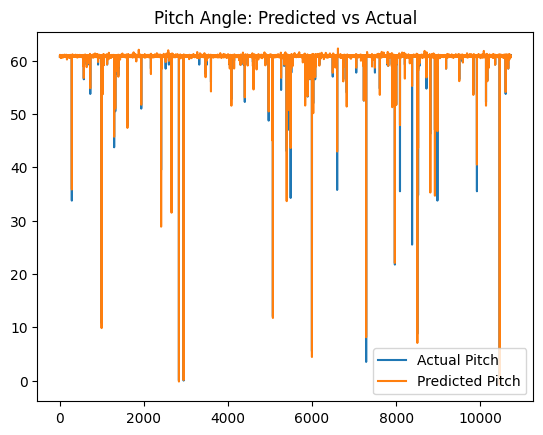

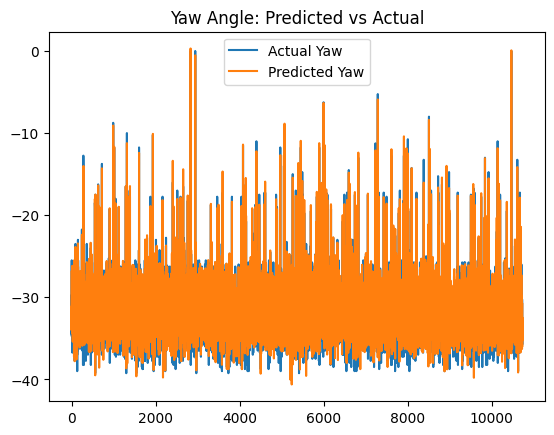

In [51]:
# Plot actual vs predicted

plt.figure()
plt.plot(Y_actual[:, 0], label='Actual Pitch')
plt.plot(Y_pred[:, 0], label='Predicted Pitch')
plt.legend()
plt.title('Pitch Angle: Predicted vs Actual')
plt.show()

plt.figure()
plt.plot(Y_actual[:, 1], label='Actual Yaw')
plt.plot(Y_pred[:, 1], label='Predicted Yaw')
plt.legend()
plt.title('Yaw Angle: Predicted vs Actual')
plt.show()

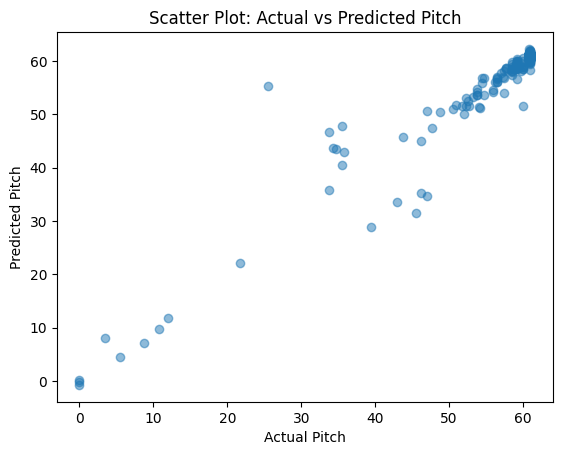

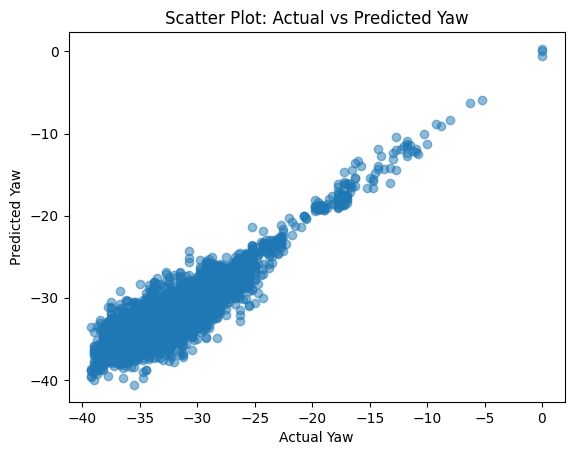

In [52]:
plt.scatter(Y_actual[:, 0], Y_pred[:, 0], alpha=0.5)
plt.xlabel('Actual Pitch')
plt.ylabel('Predicted Pitch')
plt.title('Scatter Plot: Actual vs Predicted Pitch')
plt.show()

plt.scatter(Y_actual[:, 1], Y_pred[:, 1], alpha=0.5)
plt.xlabel('Actual Yaw')
plt.ylabel('Predicted Yaw')
plt.title('Scatter Plot: Actual vs Predicted Yaw')
plt.show()

In [53]:
# Save the Model
model.save('2dof_helicopter_LSTM_model.h5')
print("Model saved successfully.")

Model saved successfully.
